# 3.0 KNN Experiment

In [27]:
import pandas as pd
data = pd.read_csv("dataset/pose_data_augmented_res2.csv")

raw_features = data.iloc[:,4:103].values
add_features = data.iloc[:,112:].values
all_features = data.iloc[:,4:].values
labels = data['label_encoded'].values

## Cross Validation to Get the Optimal K

https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

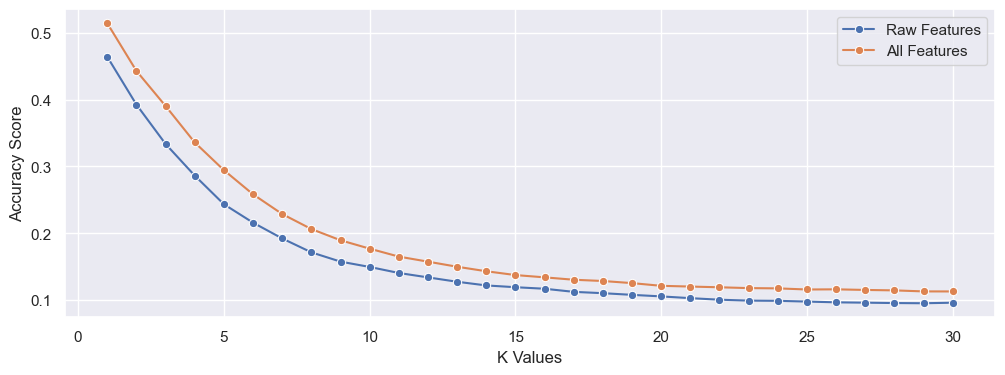

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X1 = scaler.fit_transform(raw_features)
X2 = scaler.fit_transform(all_features)
y = labels
k_values = [i for i in range(1, 31)]

scores_v1 = []
scores_v2 = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score_v1 = cross_val_score(knn, X1, y, cv=5)
    score_v2 = cross_val_score(knn, X2, y, cv=5)
    scores_v1.append(np.mean(score_v1))
    scores_v2.append(np.mean(score_v2))
    
sns.set(rc={'figure.figsize':(12,4)})
sns.lineplot(x = k_values, y = scores_v1, marker = 'o', label='Raw Features')
sns.lineplot(x = k_values, y = scores_v2, marker = 'o', label='All Features')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.xticks(ticks=k_values)
plt.show()

## Nearest Neighbors Classification

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm


X = add_features
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

clf = Pipeline(steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=1))])

clf.fit(X_train, y_train)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

clf_vis = Pipeline(steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))])
clf_vis.fit(X_train_pca, y_train)


/var/folders/8q/psx_9spx6sn4p06701_g30nh0000gn/T/ipykernel_14061/1110099928.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('hsv', num_classes)


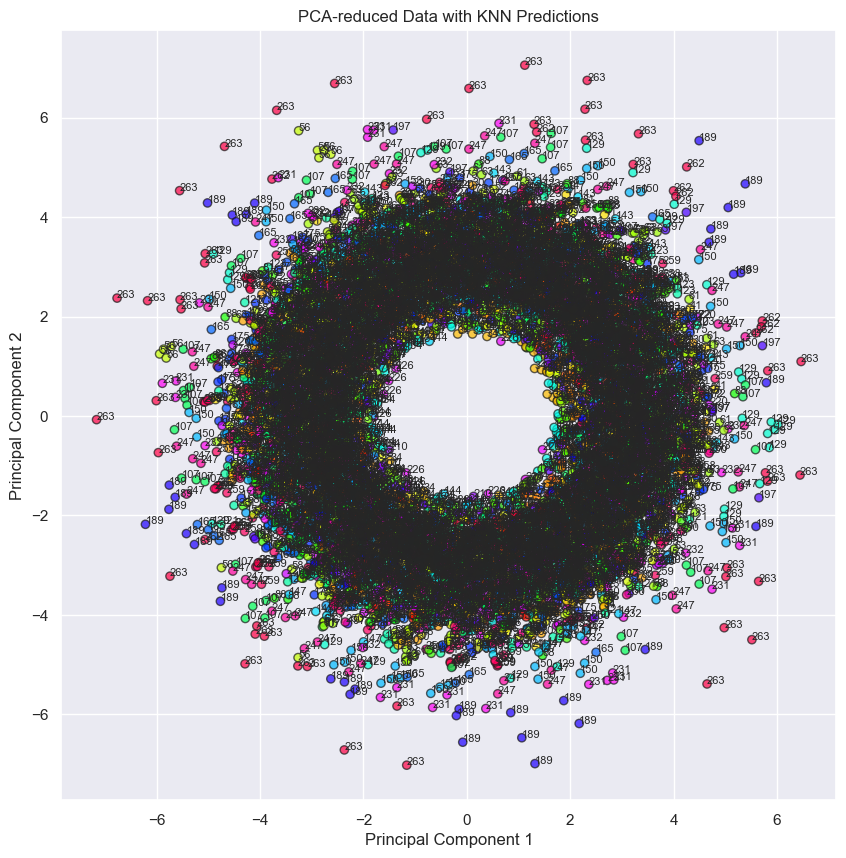

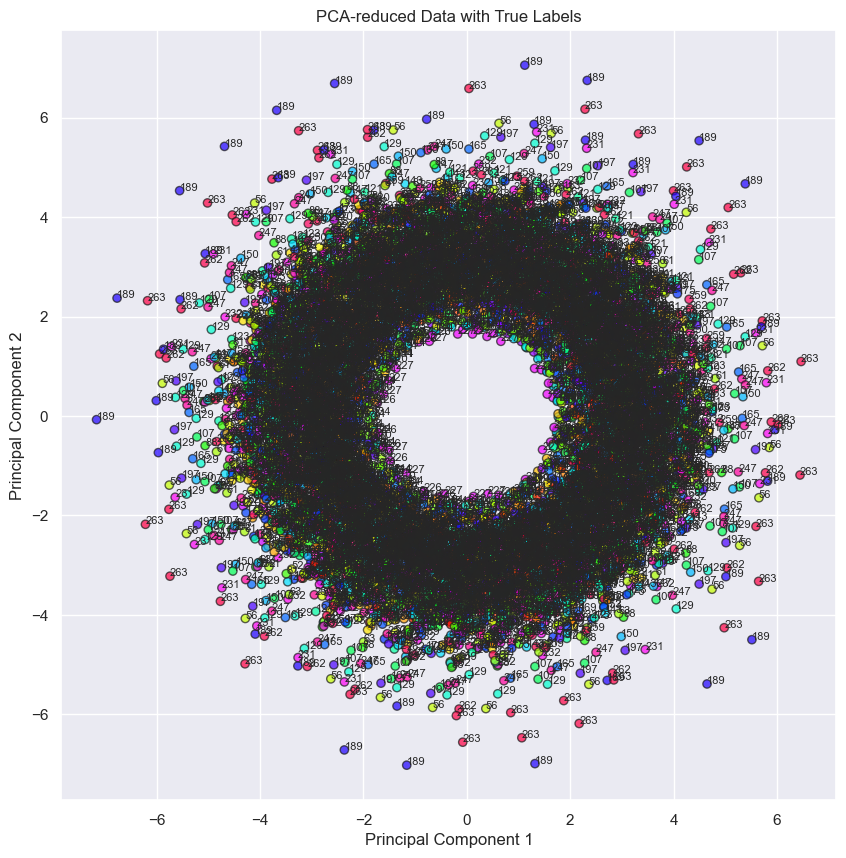

/var/folders/8q/psx_9spx6sn4p06701_g30nh0000gn/T/ipykernel_14061/1110099928.py:62: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_pca[incorrect, 0], X_test_pca[incorrect, 1], c='red', marker='x', edgecolor='k', alpha=0.7, label='Incorrect')


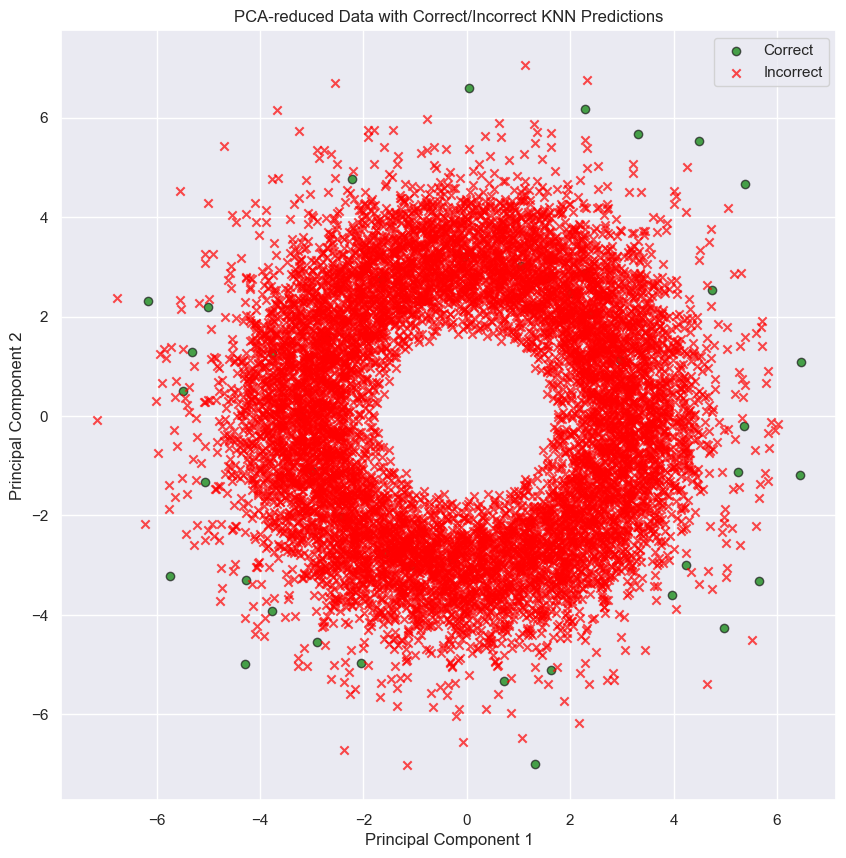

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib import cm

X = raw_features 
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

clf = Pipeline(steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=1, weights='distance'))])
clf.fit(X_train, y_train)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)  # Also transform test data

clf_vis = Pipeline(steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=1, weights='distance'))])
clf_vis.fit(X_train_pca, y_train)

y_pred = clf_vis.predict(X_test_pca)

num_classes = len(np.unique(y))
colormap = cm.get_cmap('hsv', num_classes)

# Plotting the PCA-reduced test data by predicted labels
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap=colormap, edgecolor='k', alpha=0.7)
for i, txt in enumerate(y_pred):
    plt.annotate(txt, (X_test_pca[i, 0], X_test_pca[i, 1]), fontsize=8)
#plt.colorbar(scatter, ticks=np.linspace(0, num_classes - 1, num=num_classes))
plt.title('PCA-reduced Data with KNN Predictions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.savefig('pca_knn_predictions.png',dpi=150)
plt.show()

# Plotting with true labels, using the same approach
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=colormap, edgecolor='k', alpha=0.7)
for i, txt in enumerate(y_test):
    plt.annotate(txt, (X_test_pca[i, 0], X_test_pca[i, 1]), fontsize=8)
#plt.colorbar(scatter, ticks=np.linspace(0, num_classes - 1, num=num_classes))
plt.title('PCA-reduced Data with True Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.savefig('pca_knn_truelabels.png',dpi=150)
plt.show()

plt.figure(figsize=(10, 10))

correct = y_pred == y_test
plt.scatter(X_test_pca[correct, 0], X_test_pca[correct, 1], c='green', marker='o', edgecolor='k', alpha=0.7, label='Correct')

incorrect = ~correct
plt.scatter(X_test_pca[incorrect, 0], X_test_pca[incorrect, 1], c='red', marker='x', edgecolor='k', alpha=0.7, label='Incorrect')

plt.title('PCA-reduced Data with Correct/Incorrect KNN Predictions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.savefig('pca_knn_results.png',dpi=150)
plt.show()